<a href="https://colab.research.google.com/github/firarru/Text-Mining/blob/main/Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
teks = "ibu kota negara indonesia adalah jakarta"

word = teks.split()
word

['ibu', 'kota', 'negara', 'indonesia', 'adalah', 'jakarta']

In [3]:
vocab = list(set(word)) #buat daftar unik kata
vocab_size = len(vocab) #ukuran kosakata
word_index = {word : i for i, word in enumerate(vocab)} #kata ke index
index_word = {i : word for i, word in enumerate(vocab)} #index ke kata

In [4]:
import matplotlib.pyplot as plt

#hyperparameter
embedding_dim = 2 #dimensi embedding yang kita gunakan
learning_rate = 0.01 #digunakan untuk update bobot

#word embedding matrices (inisialisasi acak)
w1 = np.random.randn(vocab_size, embedding_dim) #matrix W (6x2)
w2 = np.random.randn(embedding_dim, vocab_size) #matrix w'

In [5]:
center_word = word_index['negara'] #indeks untuk kaata pusat 'Negara'
context_words = [word_index['indonesia'], word_index['kota']] #indeks kata konteks

In [6]:
#fungsi one hot encoding
def one_hot_encoding(word_idx, vocab_size):
  one_hot = np.zeros(vocab_size)
  one_hot[word_idx] = 1
  return one_hot

#fungsi softmax
def softmax(x):
  e_x = np.exp(x-np.max(x)) #menghindari overflow
  return e_x / e_x.sum(axis=0)

#fungsi loss (negative log likelihood)
def loss_func(y_true, y_pred):
  return -np.sum(y_true * np.log(y_pred) + 1e-10)

Loss = 3.3013812535857494
Epoch 200, Loss: 3.3013812535857494
Loss = 3.284419854487771
Epoch 200, Loss: 3.284419854487771
Loss = 3.267370735010833
Epoch 200, Loss: 3.267370735010833
Loss = 3.2502280288663057
Epoch 200, Loss: 3.2502280288663057
Loss = 3.2329861646170253
Epoch 200, Loss: 3.2329861646170253
Loss = 3.2156398719273964
Epoch 200, Loss: 3.2156398719273964
Loss = 3.198184188103027
Epoch 200, Loss: 3.198184188103027
Loss = 3.1806144649009838
Epoch 200, Loss: 3.1806144649009838
Loss = 3.162926375589138
Epoch 200, Loss: 3.162926375589138
Loss = 3.145115922230289
Epoch 200, Loss: 3.145115922230289
Loss = 3.127179443163878
Epoch 200, Loss: 3.127179443163878
Loss = 3.109113620655048
Epoch 200, Loss: 3.109113620655048
Loss = 3.0909154886776866
Epoch 200, Loss: 3.0909154886776866
Loss = 3.0725824407948252
Epoch 200, Loss: 3.0725824407948252
Loss = 3.054112238096425
Epoch 200, Loss: 3.054112238096425
Loss = 3.0355030171511794
Epoch 200, Loss: 3.0355030171511794
Loss = 3.016753297925492

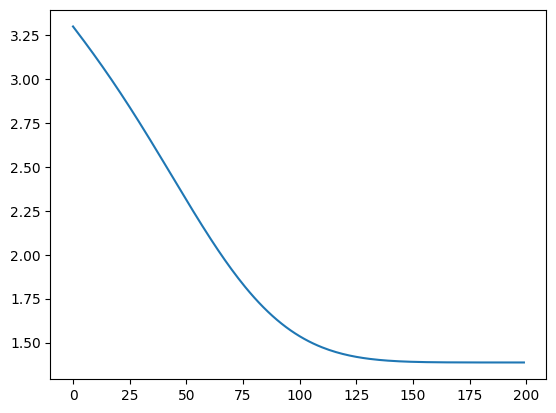

In [7]:
w1_values = []
w2_values = []
loss_values = []
iter = 200
for i in range(iter):
  #forward propagation
  x = one_hot_encoding(center_word, vocab_size) #input kata pusat

  #step 1 : hidden layer (proyeksi)
  h = np.dot(w1.T, x) #h = w1^T.x

  #step 2 : output layer
  u = np.dot(w2.T, h) #u = w2^T.h

  #step 3 : softmax untuk prediksi
  y_pred = softmax(u)

  #definisikan kata onteks yang benar (one hot encoded)
  y_true = np.sum([one_hot_encoding(w, vocab_size) for w in context_words], axis=0)

  #hitung loss (negative log likelihood)
  loss = loss_func(y_true, y_pred)
  print(f"Loss = {loss}")
  loss_values.append(loss)

  #backpropagation
  #hitung error di lapisan output
  error = y_pred - y_true

  # differencing gradien
  dif2 = np.outer(h, error)
  dif1 = np.outer(x, np.dot(w2, error))

  #update bobot
  w1 -= learning_rate * dif1
  w2 -= learning_rate * dif2
  w1_values.append(w1)
  w2_values.append(w2)

#cetak loss setiap 100 iterasi
  if iter % 100 == 0:
    print(f"Epoch {iter}, Loss: {loss}")

plt.plot(range(iter), loss_values)

#tampilkan embedding untuk setiap kata dalam kosakata
for word in vocab:
  embedding = np.dot(w1.T, one_hot_encoding(word_index[word], vocab_size))
  print(f" Embedding untuk kata '{word}': {embedding}")

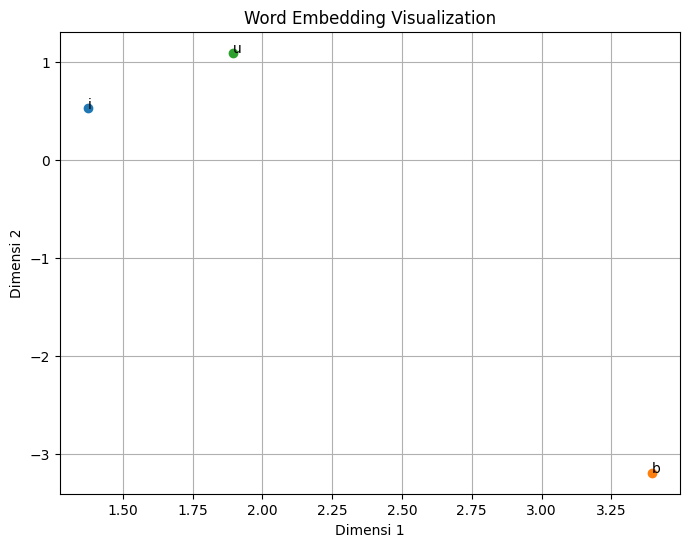

In [8]:
plt.figure(figsize=(8,6))
for i, word in enumerate(word):
  plt.scatter(w1[i, 0], w1[i,1])
  plt.annotate(word, (w1[i,0], w1[i,1]))
plt.title('Word Embedding Visualization')
plt.xlabel('Dimensi 1')
plt.ylabel('Dimensi 2')
plt.grid()
plt.show()